<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
from pathlib import Path
import zipfile

data = Path('data')
image_path = data/'piza_stake_sushi'

if image_path.is_dir():
  print('the image directory exists')
else:
  image_path.mkdir(parents = True, exist_ok = True)

In [4]:
import requests
with open(data/'pizza_steak_sushi.zip', 'wb') as f:
  req = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(req.content)


In [5]:
import zipfile
with zipfile.ZipFile(data/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping the files')
  zip_ref.extractall(image_path)

unzipping the files


# **Becoming one with the data**

In [6]:
import os
os.walk(image_path)

<generator object _walk at 0x7e11b2a991c0>

In [7]:
def oswalk(dirpath):

  for dirpath, dirnames, filepath in os.walk(dirpath):
    print(f'the dirpath is {dirpath} file path is {len(filepath)} dir name is {len(dirnames)}')

In [8]:
oswalk(image_path)

the dirpath is data/piza_stake_sushi file path is 0 dir name is 2
the dirpath is data/piza_stake_sushi/train file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/train/sushi file path is 72 dir name is 0
the dirpath is data/piza_stake_sushi/train/steak file path is 75 dir name is 0
the dirpath is data/piza_stake_sushi/train/pizza file path is 78 dir name is 0
the dirpath is data/piza_stake_sushi/test file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/test/sushi file path is 31 dir name is 0
the dirpath is data/piza_stake_sushi/test/steak file path is 19 dir name is 0
the dirpath is data/piza_stake_sushi/test/pizza file path is 25 dir name is 0


In [9]:
image_path

PosixPath('data/piza_stake_sushi')

In [10]:
train_dir = image_path / 'train'
test_dir = image_path/'test'

# **Visualizing the image**

In [11]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))


In [12]:
random_image = random.choice(image_path_list)
random_image

PosixPath('data/piza_stake_sushi/train/sushi/1575445.jpg')

In [13]:
class_of_random = random_image.parent.stem

Random image path is data/piza_stake_sushi/train/sushi/1575445.jpg
image class is sushi
image height : 307
image width : 512


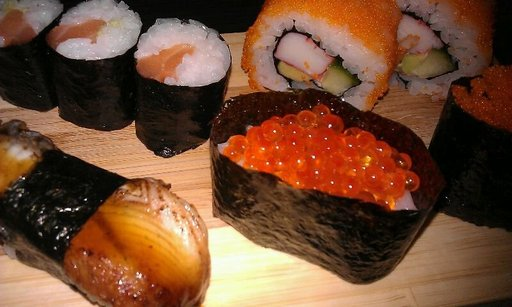

In [14]:
img = Image.open(random_image)
print(f'Random image path is {random_image}')
print(f'image class is {class_of_random}')
print(f'image height : {img.height}')
print(f'image width : {img.width}')
img

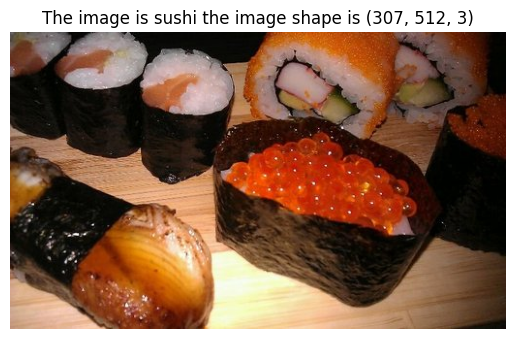

In [15]:
import matplotlib.pyplot as plt
import numpy as np

image_np = np.asarray(img)

plt.imshow(img);
plt.title(f'The image is {class_of_random} the image shape is {image_np.shape}');
plt.axis(False);

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

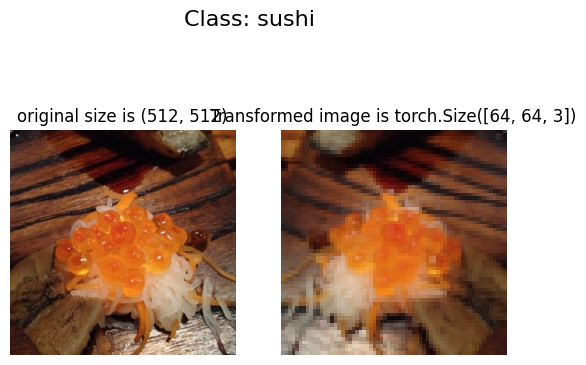

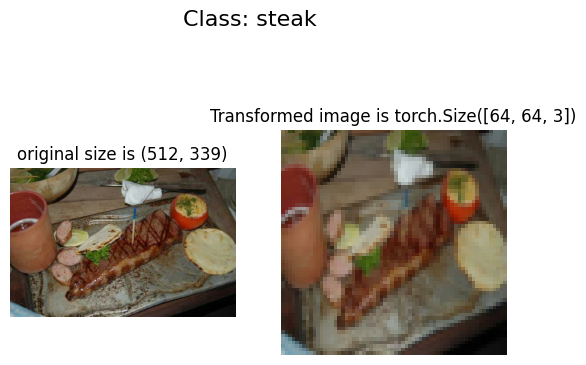

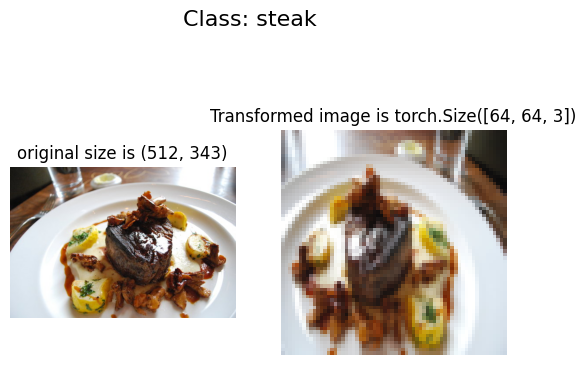

In [17]:
def plot_transformed_images(image_paths, transform, n =3, seed = 43):
  """ This function will plot the images before and after transforming side by side"""

  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f'original size is {f.size}')
      ax[0].axis('off');

      #Transform and plot image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed image is {transformed_image.shape}')
      ax[1].axis('off');

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize = 16)


plot_transformed_images(image_path_list, data_transform, 3)








# **Loading Image Data Using Image Loader**

In [18]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [19]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir,
                                     transform = data_transform,
                                     target_transform = None)
test_dataset = datasets.ImageFolder(root = test_dir,
                                    transform = data_transform,
                                    target_transform = None)


In [20]:
len(train_dataset), len(test_dataset)

(225, 75)

In [21]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/piza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [22]:
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [23]:
class_dict = train_dataset.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
image, label = train_dataset[0]

print(f'the image shape: {image.shape}')
print(f'the label shape: {label}')
print(f'the image dtype: {image.dtype}')
print(f'the label dtype: {type(label)}')

the image shape: torch.Size([3, 64, 64])
the label shape: 0
the image dtype: torch.float32
the label dtype: <class 'int'>


the image shape is torch.Size([3, 64, 64]) the permuted shape is torch.Size([64, 64, 3])


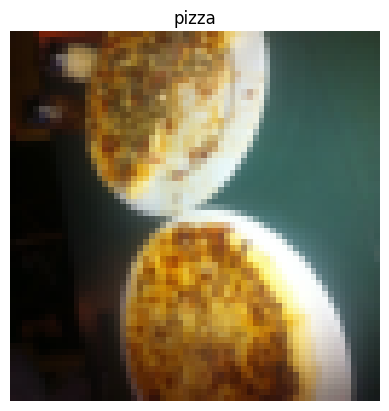

In [25]:
permuted_image = image.permute(2,1,0)
print(f'the image shape is {image.shape} the permuted shape is {permuted_image.shape}')
plt.imshow(permuted_image)
plt.title(class_names[label])
plt.axis('off');


In [26]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size = 32,shuffle = True)
test_dataloader = DataLoader (test_dataset, batch_size = 32, shuffle = True)

In [27]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e11aa95dcf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e11aa95d450>)

In [28]:
image, label = next(iter(train_dataloader))

In [29]:
image.shape

torch.Size([32, 3, 64, 64])

In [30]:
label.shape

torch.Size([32])

# **Loading Image with custom Datasets**

In [31]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [32]:
train_dataset.classes, test_dataset.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [33]:
image_path

PosixPath('data/piza_stake_sushi')

In [34]:
os.scandir(image_path/'train')

In [35]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [36]:
for entry in os.scandir(train_dir):
  print(entry)

<DirEntry 'sushi'>
<DirEntry 'steak'>
<DirEntry 'pizza'>


In [37]:
def find_classes(directory):
  classes = []
  class_dic = {}
  for entry in os.scandir(directory):
    classes.append(entry.name)
  for i, classname in enumerate(classes):
    class_dic[classname] = i
  return classes, class_dic

In [38]:
find_classes(train_dir)

(['sushi', 'steak', 'pizza'], {'sushi': 0, 'steak': 1, 'pizza': 2})

In [39]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, target_dir:str,transform = None) -> None:

    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  def load_image(self, index:int):
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self,index:int) -> Tuple[torch.tensor, int]:

    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [40]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [41]:
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                     transform = test_transforms)

In [42]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e11aa95f0d0>,
 <__main__.ImageFolderCustom at 0x7e11aa95f430>)

In [43]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [44]:
train_data_custom.classes

['sushi', 'steak', 'pizza']

In [45]:
train_data_custom.class_to_idx

{'sushi': 0, 'steak': 1, 'pizza': 2}

# **Create a function to display Random Images**

In [46]:
def display_random_images(train_dataset = train_dataset, classes= False, n = 10, img_shape = False, seed = None):

  if n>10:
    n = 10
    print('we cant print images more than 10')

  random.seed(seed)
  images = random.sample(range(len(train_dataset)), k= n)
  print(images)

  plt.figure(figsize = (16,9))
  # print('plt is right')
  for i in range(len(images)):
    # print('starting images')
    plt.subplot(5,2,i+1)
    # print('sub plot is right')
    img,label = train_dataset[images[i]]
    trans_img = img.permute(1,2,0)
    plt.imshow(trans_img)
    tit = ''
    if classes:
      tit = tit + 'the class name is ' + class_names[label]
    if img_shape:
      tit +='  and  '
      tit += str(img.shape)
    plt.title(tit)
  plt.tight_layout()
  plt.show()


we cant print images more than 10
[195, 13, 142, 88, 104, 110, 175, 91, 9, 146]


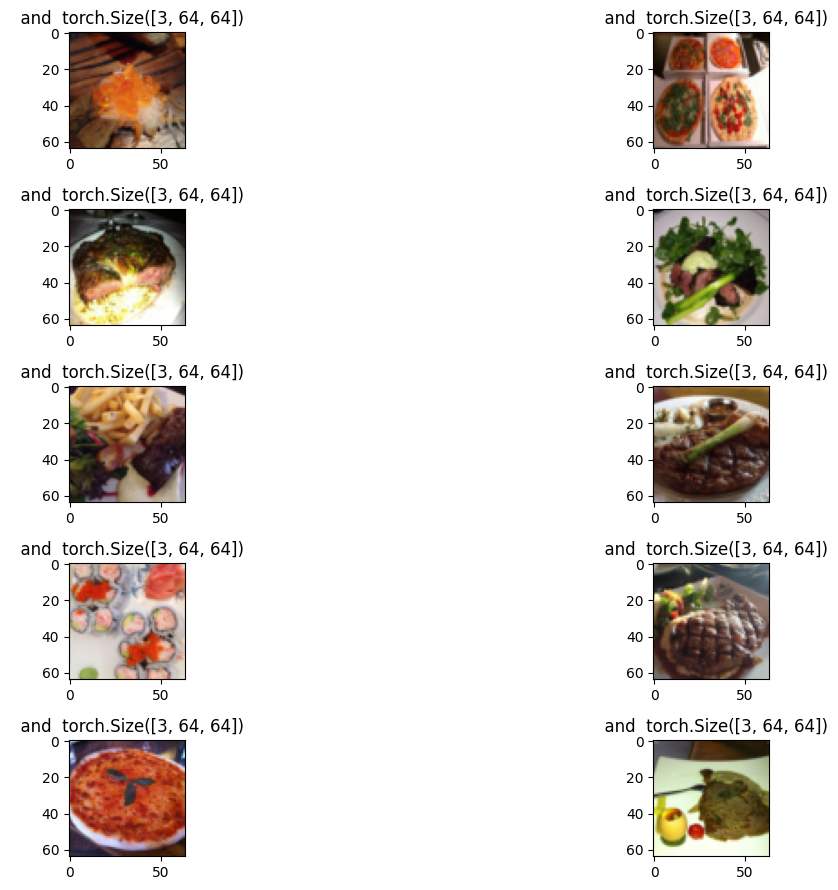

In [47]:
display_random_images(classes = False, n = 12, img_shape = True, seed = None)

# **Plot the image with out custom generated datasets**

[181, 70, 41, 137, 15, 78, 159, 64, 38, 172]


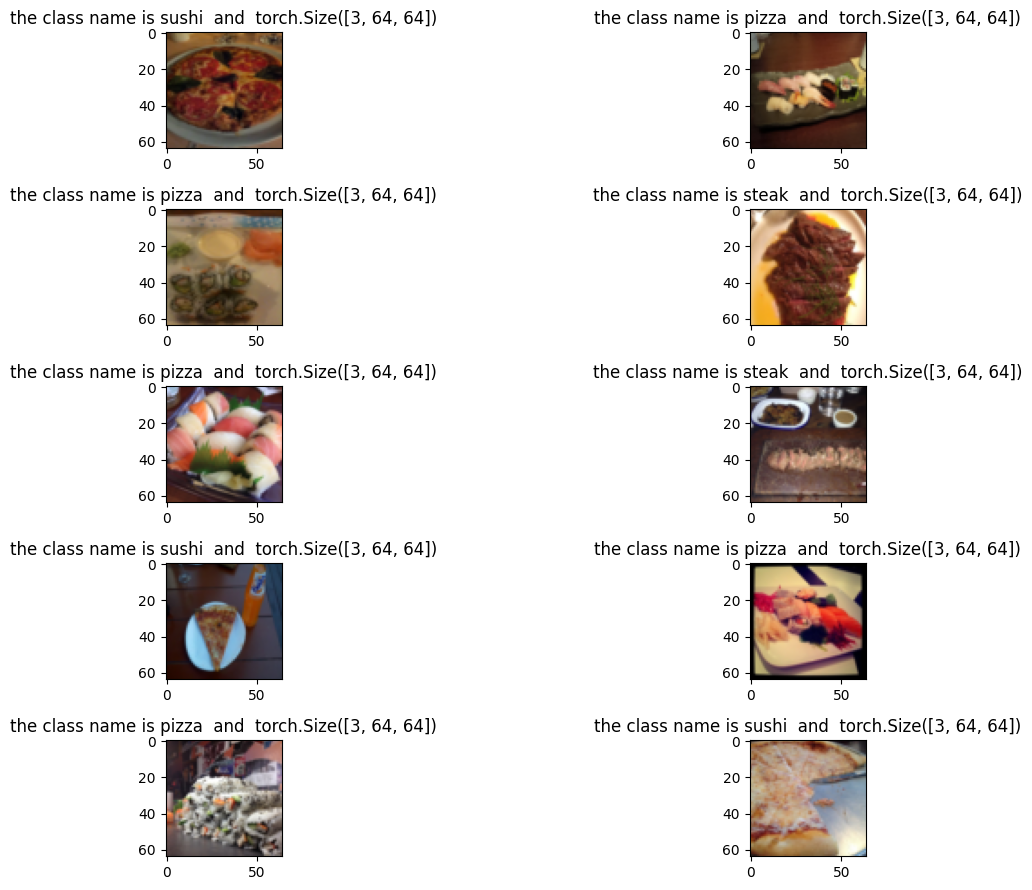

In [48]:
display_random_images(train_dataset = train_data_custom,classes = True, n= 10, img_shape = True, seed= None)

In [49]:
train_data_custom

In [50]:
train_dataset # we see that the variable passed don't show impact outside the function

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/piza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

# **Load the custom made data into dataloaders**

In [51]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size = 32,
                                     shuffle = True,
                                     num_workers =1)

test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size = 32,
                                    num_workers= 1)


In [52]:
train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7e11aa478be0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e11aa30bc70>)

In [53]:
image, label = next(iter(train_dataloader))

print(f'the image shape is {image.shape}')
print(f'the label shape is {label.shape}')

the image shape is torch.Size([32, 3, 64, 64])
the label shape is torch.Size([32])


**Test the trivial augumenation**

In [54]:
from torchvision import transforms
triv_train_transform = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(31),
    transforms.ToTensor()

])

triv_test_transform = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [55]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [56]:
len(image_path_list)

300

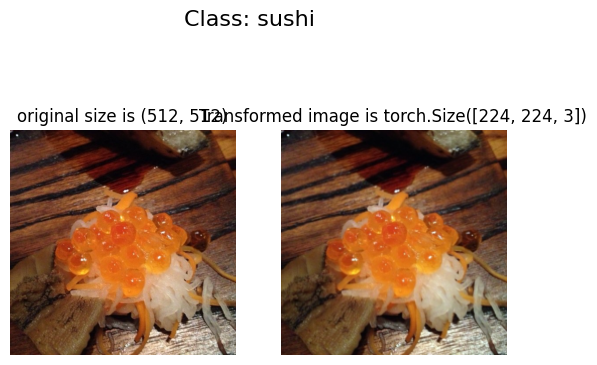

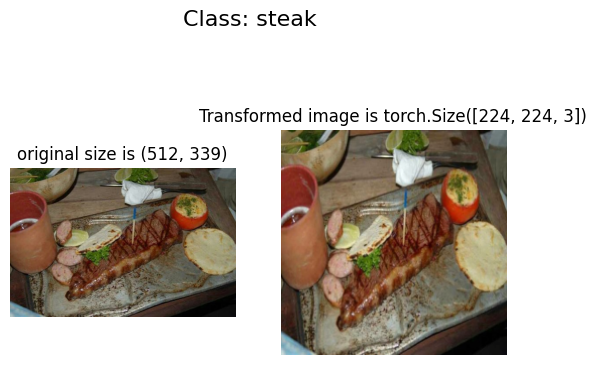

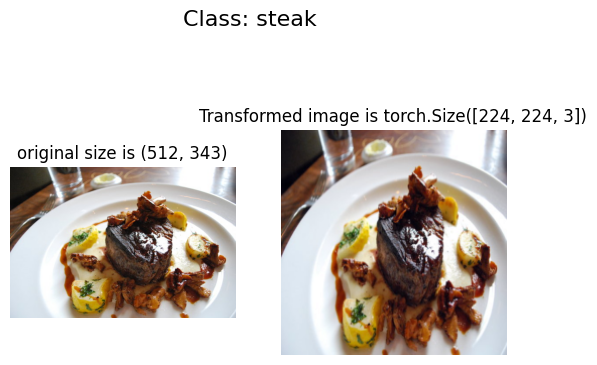

In [57]:
plot_transformed_images(image_path_list, transform = triv_train_transform,n = 3)

In [58]:
image_path_list[0]

PosixPath('data/piza_stake_sushi/train/sushi/3579071.jpg')

In [59]:
train_dir

PosixPath('data/piza_stake_sushi/train')

**Train model 0**

In [60]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [61]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir,transform = simple_transform)
test_dataset = datasets.ImageFolder(root= test_dir,transform = simple_transform)

In [62]:
import os
NUM_WORKERS = os.cpu_count()

In [63]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True, num_workers= NUM_WORKERS)
test_dataloader = DataLoader(dataset = test_dataset, batch_size = 32,shuffle = False, num_workers = NUM_WORKERS)

In [64]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e11a9faa7a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e11a9faa170>)

In [65]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [68]:
image, label = (next(iter(train_dataloader)))

In [71]:
image[0].shape

torch.Size([3, 64, 64])

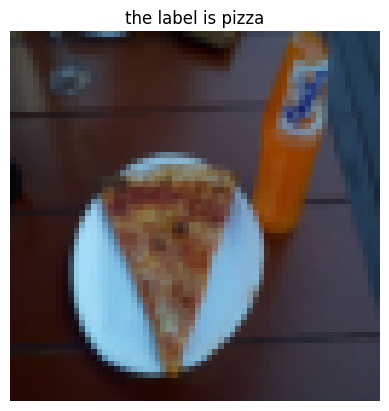

In [74]:
per_img = image[0].permute(1,2,0)
plt.imshow(per_img)
plt.title(f'the label is {class_names[label[0]]}')
plt.axis(False);